## <center> NYC Health data about COVID-19 spread

Data on Covid-19 about testing ratio, prevalence and incidence of the SARS-CoV-2 pandemic at zip code level, up to October 1st, 2020. Data have been downloaded from NYC Health Department website (https://www1.nyc.gov/site/doh/covid/covid-19-data.page).

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
from colorspacious import cspace_converter
from collections import OrderedDict
from shapely import wkt

### <center> Positive cases to the antybody test for Covid-19 in NYC's per ZCTA
    
ZCTA: ZIP Code Tabulation Area. A US Census statistical area designed to approximate areal USPS ZIP Codes. They are aggregations of census blocks where a majority of addresses have the same ZIP Code. 

The below map provides the percentage of residents at ZCTA level that have been tested with a positive result at October 1st, 2020, considering the tests carried out from March till October, 2020.
An antibody test can find out if you have ever had the virus and these recent data provide a broader picture now that more people without severe illness are getting tested.

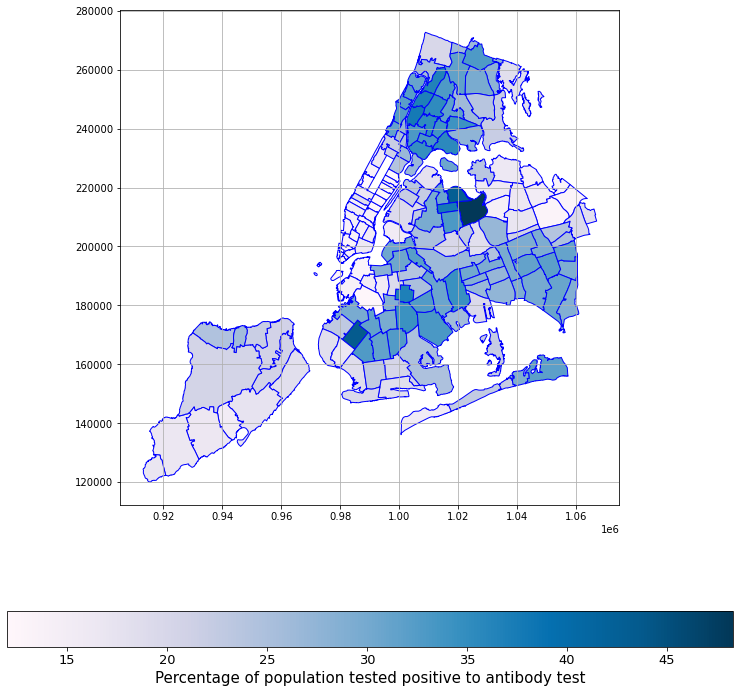

In [32]:
testbyzc = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /coronavirus-data-nychealth-october/testing/antibody-by-modzcta.csv")                       
zipcode_map=gpd.read_file("/home/claudia/Scrivania/Tesi NYC pandemic /ZIP_CODE_040114/ZIP_CODE_040114.shp")
zipcode_map.rename(columns={'ZIPCODE': 'modzcta_first'}, inplace=True) 

zipcode_map['modzcta_first']=pd.to_numeric(zipcode_map['modzcta_first'])
testbyzc['modzcta_first']=pd.to_numeric(testbyzc['modzcta_first'])

nyc_per_zipcodes=pd.merge(zipcode_map,testbyzc, how='left', on= ['modzcta_first', 'modzcta_first']) 

fig,ax = plt.subplots(figsize=(13,13))
nyc_per_zipcodes.plot(column='PERCENT_POSITIVE', cmap='PuBu', ax=ax, figsize=(8,8), edgecolor='b', legend=True, legend_kwds={'label': "Percentage of population tested positive to antibody test",'orientation': "horizontal"})
fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=13)
ax.figure.axes[-1].xaxis.label.set_size(15)

plt.grid()

The second map shows the rate of positive cases in NYC at zip code level per 100,000 residents.

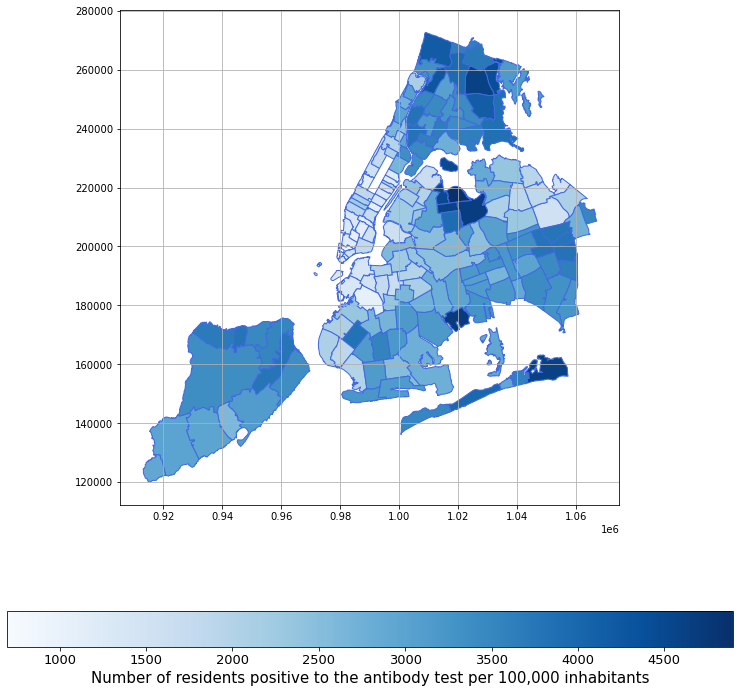

In [33]:
databyzcta=pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /coronavirus-data-nychealth-october/data-by-modzcta.csv")

databyzcta.rename(columns={'MODIFIED_ZCTA': 'modzcta_first'}, inplace=True) 
databyzcta['modzcta_first']=pd.to_numeric(databyzcta['modzcta_first'])
data_per_zipcodes=pd.merge(zipcode_map, databyzcta, how='left', on= ['modzcta_first', 'modzcta_first']) #merge delle due tabelle dati per 

fig,ax = plt.subplots(figsize=(13,13))
data_per_zipcodes.plot(column='COVID_CASE_RATE', cmap='Blues', ax=ax, figsize=(10,10), edgecolor='royalblue', legend=True, legend_kwds={'orientation': "horizontal", "label" : "Number of residents positive to the antibody test per 100,000 inhabitants"})
plt.grid()

fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=13)
ax.figure.axes[-1].xaxis.label.set_size(15)

In this last table, the testing ratio is visualized, in order to focus on the differences at geographical level in NYC in access to the antibody tests: the highest ratio of testing is related to Manhattan borough and in general to wealthiest neighborhoods.

In [30]:
data_per_zipcodes.replace(np.nan, 0 , inplace = True)
data_per_zipcodes['testing_ratio'] = data_per_zipcodes['TOTAL_COVID_TESTS']/data_per_zipcodes['POPULATION']
data_per_zipcodes.replace(np.inf, 0, inplace = True)

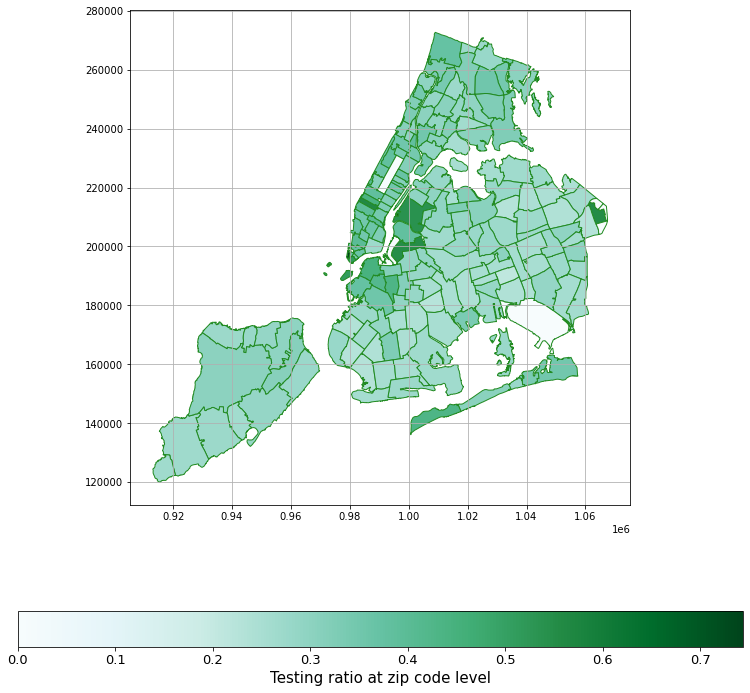

In [31]:
fig,ax = plt.subplots(figsize=(13,13))
data_per_zipcodes.plot(column='testing_ratio', cmap='BuGn', ax=ax, figsize=(8,8), edgecolor='forestgreen', legend=True, legend_kwds={'orientation': "horizontal", 'label':'Testing ratio at zip code level'})
plt.grid()

fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=13)
ax.figure.axes[-1].xaxis.label.set_size(15)

Let's now investigate how the differences in the testing ratio have affected the health results on COVID-19 cumulative incidence in the early months of the pandemic.

From the scatter plot below is evident that an higher number of positive results to the  antibody tests is positively correlated reasonably to an increasing number of tests carried out, but the trend is slightly different per borough:to analyze these relationships is reasonable to first check the linear correlation between tests carried out and positive cases.

In particular, we see that for the Bronx there's ah higher correlation between people that are tested and result positive to Covid-19 w.r.t Brooklyn data, taking into account the whole scenario of people getting tested.

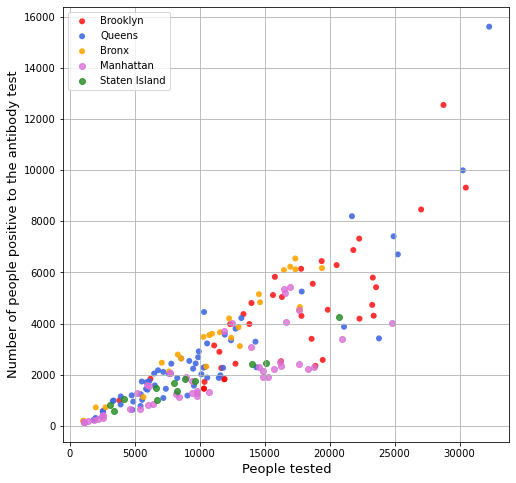

In [35]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Kings"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Kings"].NUM_PEOP_POS, color='r', label='Brooklyn', alpha=0.8, edgecolors='none')
ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Queens"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Queens"].NUM_PEOP_POS, color='royalblue', label='Queens' ,alpha=0.9, edgecolors='none')
ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Bronx"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Bronx"].NUM_PEOP_POS, color='Orange', label='Bronx' ,alpha=0.9, edgecolors='none')
ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "New York"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "New York"].NUM_PEOP_POS, color='orchid', label='Manhattan', alpha=0.8)
ax.scatter(x=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Richmond"].NUM_PEOP_TEST,y=nyc_per_zipcodes[nyc_per_zipcodes['COUNTY'] == "Richmond"].NUM_PEOP_POS, color='forestgreen', label='Staten Island', alpha=0.8)

ax.set_ylabel('Number of people positive to the antibody test', fontsize=13)
ax.set_xlabel('People tested', fontsize=13)
ax.legend(loc='best')
ax.grid()

nyc_per_zipcodes['NUM_PEOP_TEST'].sum(); #numero totale di  antibody tests su nyc

In [39]:
#correlations for the whole set of number of tested people (Pearson's method)
c_dataframe = pd.DataFrame(nyc_per_zipcodes.drop(columns='geometry'))

corr_Brooklyn= c_dataframe[c_dataframe['COUNTY'] == "Kings"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr_Bronx= c_dataframe[c_dataframe['COUNTY'] == "Bronx"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr_Queens=c_dataframe[c_dataframe['COUNTY'] == "Queens"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr_Manhattan= c_dataframe[c_dataframe['COUNTY'] == "New York"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr_Staten_Island= c_dataframe[c_dataframe['COUNTY'] == "Richmond"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']

In [40]:
grouped=c_dataframe.groupby('COUNTY')

num_tested = grouped['NUM_PEOP_TEST'].sum()
num_positive = grouped['NUM_PEOP_POS'].sum()
linear_corr=[corr_Bronx, corr_Brooklyn, corr_Manhattan, corr_Queens, corr_Staten_Island]

#correlation till #of tests 20000
c_dataframe1 = c_dataframe[(c_dataframe['NUM_PEOP_TEST'].astype(float)<=20000)]
grouped1=c_dataframe1.groupby('COUNTY')

corr1_Brooklyn= c_dataframe1[c_dataframe1['COUNTY'] == "Kings"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr1_Bronx= c_dataframe1[c_dataframe1['COUNTY'] == "Bronx"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr1_Queens=c_dataframe1[c_dataframe1['COUNTY'] == "Queens"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr1_Manhattan= c_dataframe1[c_dataframe1['COUNTY'] == "New York"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']
corr1_Staten_Island= c_dataframe1[c_dataframe1['COUNTY'] == "Richmond"].corr()['NUM_PEOP_TEST']['NUM_PEOP_POS']

num_tested1 = grouped['NUM_PEOP_TEST'].sum()
num_positive1 = grouped['NUM_PEOP_POS'].sum()
linear_corr1=[corr1_Bronx, corr1_Brooklyn, corr1_Manhattan, corr1_Queens, corr1_Staten_Island]

#population data per borough 
nyc_pop=pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Nyc_population_per_borough.csv")
nyc_pop_2019=nyc_pop.iloc[0]

nyc_pop_per_borough=[nyc_pop_2019['Bronx County (Bronx Borough), New York'], nyc_pop_2019['Kings County (Brooklyn Borough), New York'], 
                     nyc_pop_2019['New York County (Manhattan Borough), New York'], nyc_pop_2019['Queens County (Queens Borough), New York'], 
                     nyc_pop_2019['Richmond County (Staten Island Borough), New York'] ]

tab=pd.DataFrame({ 'Borough population' : nyc_pop_per_borough, 'Tot n of tested people (x)': num_tested,
                  'Tot n of positive cases (y)': num_positive,
                  'Lin Correlation between x and y' : linear_corr,'Tot n of positive under 20000 tested (i)': num_positive1,
                  'Lin Correlation between i and limited testing (max of 20000 tests)': linear_corr1 })

tab['Lin Correlation between x and y']=tab['Lin Correlation between x and y']*100
tab['Lin Correlation between x and y']=np.round(tab['Lin Correlation between x and y'], 2)
tab['Lin Correlation between x and y']=tab['Lin Correlation between x and y'].astype(str)+'%'

tab['Lin Correlation between i and limited testing (max of 20000 tests)']=tab['Lin Correlation between i and limited testing (max of 20000 tests)']*100
tab['Lin Correlation between i and limited testing (max of 20000 tests)']=np.round(tab['Lin Correlation between i and limited testing (max of 20000 tests)'], 2)
tab['Lin Correlation between i and limited testing (max of 20000 tests)']=tab['Lin Correlation between i and limited testing (max of 20000 tests)'].astype(str)+'%'

tab

,Borough population,Tot n of tested people (x),Tot n of positive cases (y),Lin Correlation between x and y,Tot n of positive under 20000 tested (i),Lin Correlation between i and limited testing (max of 20000 tests)
COUNTY,,,,,,
Bronx,"1,418,207",302561.0,94699.0,95.94%,94699.0,95.94%
Kings,"2,559,903",649793.0,168565.0,82.25%,168565.0,70.41%
New York,"1,628,706",489626.0,91703.0,82.04%,91703.0,81.15%
Queens,"2,253,858",603224.0,158520.0,89.68%,158520.0,86.35%
Richmond,"476,143",108848.0,20733.0,97.15%,20733.0,96.16%


From this summary table is evident that getting rid of the outlier values (by setting the maximum value of the antibody tests carried out to 20000) can alter the correlation coefficient and allows us to compare the positive percent of tested in the five different borough; the fact that the percentage of positives does not vary much with the limit imposed for the Bronx means that there is a limited number of tests carried out in that borough w.r.t. to Kings (Brooklyn), Manhattan (New York zipcodes) or Queens; for Staten Island the correlation value is very high even with the treshold of 20000 tests, but this is probably due to the number of tests, that corrisponds almost to the 25% of the population (this means an higher percentage of testing in this borough).

Let's do the previous analysis using the fraction of people tested and positive in each zip code.

In [42]:
#population file for nyc at zcta level updated at 2020
pop_file = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility_ZCTAlevel/tot_pop_zcta.txt", sep=" ", header=None)
pop_file.columns = ["zcta_id", "population_2020"]
unique_zcta = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility_ZCTAlevel/Analysis/unique_zcta_nyc.csv")
del unique_zcta['Unnamed: 0']
pop_zcta = pd.merge(left=unique_zcta, right=pop_file, left_on='zcta_id', right_on='zcta_id')
nyc_per_zipcodes.replace(np.nan, 0)
nyc_per_zipcodes.rename(columns={"modzcta_first": "zcta"}, inplace = True)

In [43]:
nyc_per_zcta = pop_zcta.merge(right= nyc_per_zipcodes, how='inner', on='zcta')
nyc_per_zcta.drop_duplicates(subset=['zcta'], keep='first', inplace=True)

#frazione di persone testate e positive rispetto alla popolazione
nyc_per_zcta['Frac_tested'] = nyc_per_zcta['NUM_PEOP_TEST']/nyc_per_zcta['population_2020']
nyc_per_zcta['Frac_tested'].replace(np.inf, 0, inplace=True)
nyc_per_zcta['Frac_positive'] = nyc_per_zcta['NUM_PEOP_POS']/nyc_per_zcta['population_2020']
nyc_per_zcta['Frac_positive'].replace(np.inf,0, inplace=True)

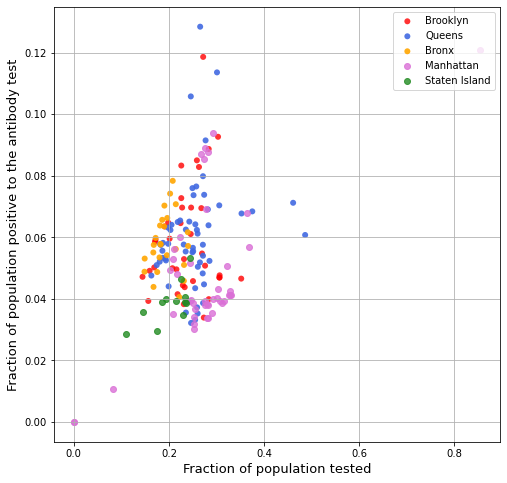

In [44]:
#scatterplot per borough with number of people tested and posive to the test, over the total population
fig2, ax2 = plt.subplots(figsize=(8,8))

ax2.scatter(x=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "Kings"].Frac_tested,y=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "Kings"].Frac_positive, color='red', label='Brooklyn', alpha=0.8, edgecolors='none')
ax2.scatter(x=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "Queens"].Frac_tested,y=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "Queens"].Frac_positive, color='royalblue', label='Queens' ,alpha=0.9, edgecolors='none')
ax2.scatter(x=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "Bronx"].Frac_tested,y=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "Bronx"].Frac_positive, color='Orange', label='Bronx' ,alpha=0.9, edgecolors='none')
ax2.scatter(x=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "New York"].Frac_tested,y=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "New York"].Frac_positive, color='orchid', label='Manhattan', alpha=0.8)
ax2.scatter(x=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "Richmond"].Frac_tested,y=nyc_per_zcta[nyc_per_zcta['COUNTY'] == "Richmond"].Frac_positive, color='forestgreen', label='Staten Island', alpha=0.8)

ax2.set_ylabel('Fraction of population positive to the antibody test', fontsize=13)
ax2.set_xlabel('Fraction of population tested', fontsize=13)
ax2.legend(loc='upper right')
ax2.grid()